In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
# Loading the iris dataset

df=pd.read_csv(r"C:\Users\Aditya Mishra\Downloads\iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


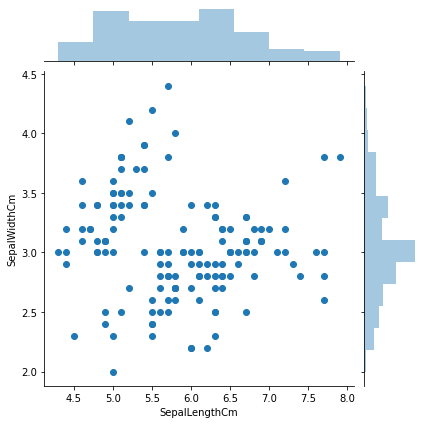

In [6]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df)

In [7]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='gist_earth_r', annot=True)
plt.show(

SyntaxError: unexpected EOF while parsing (<ipython-input-7-9649be266ec9>, line 3)

In [8]:
# Dropping the id and Species section
df_new=df.drop(['Species','Id'],axis=1)
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X=df_new
y=df["Species"]

In [10]:
# Split Train and Test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:

X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
69,5.6,2.5,3.9,1.1
25,5.0,3.0,1.6,0.2
140,6.7,3.1,5.6,2.4
19,5.1,3.8,1.5,0.3
125,7.2,3.2,6.0,1.8
...,...,...,...,...
138,6.0,3.0,4.8,1.8
133,6.3,2.8,5.1,1.5
134,6.1,2.6,5.6,1.4
90,5.5,2.6,4.4,1.2


In [12]:

y_train

69     Iris-versicolor
25         Iris-setosa
140     Iris-virginica
19         Iris-setosa
125     Iris-virginica
            ...       
138     Iris-virginica
133     Iris-virginica
134     Iris-virginica
90     Iris-versicolor
24         Iris-setosa
Name: Species, Length: 120, dtype: object

In [13]:
tree_new=DecisionTreeClassifier(criterion='entropy')
tree_new.fit(X_train, y_train)
y_pred=tree_new.predict(X_test)

In [14]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0 11  0]
 [ 0  1  6]]


In [16]:
# Checking the Accuracy of Model

print(accuracy_score(y_pred,y_test))

0.9666666666666667


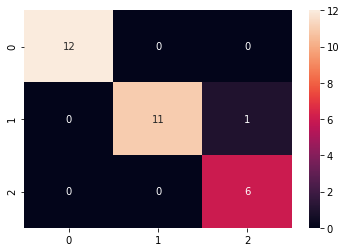

In [17]:

sns.heatmap(confusion_matrix(y_pred, y_test),annot=True)
plt.show()

In [18]:

dtree=list(df_new.columns.values)
dtree

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

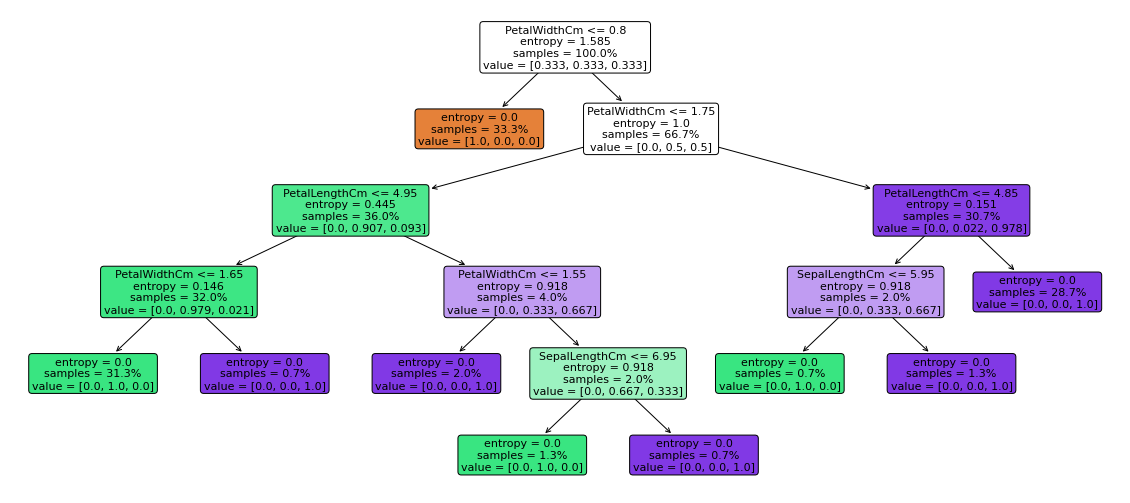

In [19]:
plt.figure(figsize=(20,9))
tree.plot_tree(tree_new.fit(X,y), feature_names=dtree, filled=True, precision=3, proportion=True,rounded=True)
plt.show()